In [7]:
import urllib
import json
import re
import numpy as np
import pandas as pd
import codecs
from pandas.io.json import json_normalize

In [2]:
# return mean growth rate for a list of values
def get_mean_growth_rate(pop):
    if all([v == 0 for v in pop]):
        return 0
    return np.mean(np.exp(np.diff(np.log(pop))) - 1)

In [10]:
url = 'https://api.covidlive.co.uk/ukdata.json' # remote js file with data

# read in the js file
with urllib.request.urlopen(url) as http_content:
    raw_js = http_content.read().decode('utf-8')

In [39]:
s1 = json.loads(raw_js)
normalised_data = json_normalize(s1)
case_data = normalised_data.set_index(pd.to_datetime(normalised_data.day, format='%d/%m/%Y')).drop('day',axis=1).sort_index().astype(np.float64)
case_data

,regions.Aneurin Bevan,regions.Antrim and Newtownabbey,"regions.Armagh, Banbridge and Craigavon",regions.Awaiting confirmation,regions.Ayrshire and Arran,regions.Barking and Dagenham,regions.Barnet,regions.Barnsley,regions.Bath and North East Somerset,regions.Bedford,...,regions.Wirral,regions.Wokingham,regions.Wolverhampton,regions.Worcestershire,regions.Wrexham,regions.York,regions.awaiting clarification,totalCases,totalDeaths,totalTested
day,,,,,,,,,,,,,,,,,,,,,
2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,1758.0
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,5207.0
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,7132.0
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,7690.0
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,8986.0
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0.0,10483.0
2020-03-01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,0.0,11750.0
2020-03-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0,13525.0
2020-03-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,0.0,13911.0


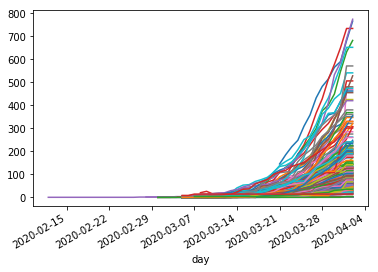

In [44]:
case_data.drop(['totalCases', 'totalDeaths', 'totalTested'], axis=1).plot(legend=False)

In [45]:
# interpolate missing values and mask values where number of cases has declined 
interpolated_cases = case_data.interpolate()
masked_cases = interpolated_cases.mask(interpolated_cases.diff()<0)

# interpolate masked missing values, zero fill where no cases reported, calculate percentage change
pct_changes = masked_cases.interpolate().fillna(0).pct_change()

# replace values where pct change is infinite (i.e. first reported case)
# calculate mean change from last 7 days
print(pct_changes.replace([np.inf, -np.inf], np.nan).fillna(0).tail(7).mean().sort_values().to_string())

regions.Caerphilly                             0.000000
regions.Poole                                  0.000000
regions.Pembrokeshire                          0.000000
regions.Orkney                                 0.000000
regions.Newport                                0.000000
regions.Neath Port Talbot                      0.000000
regions.Cardiff                                0.000000
regions.Monmouthshire                          0.000000
regions.Carmarthenshire                        0.000000
regions.Merthyr Tydfil                         0.000000
regions.Ceredigion                             0.000000
regions.City of London                         0.000000
regions.Conwy                                  0.000000
regions.Isles of Scilly                        0.000000
regions.Isle of Anglesey                       0.000000
regions.Denbighshire                           0.000000
regions.Hackney                                0.000000
regions.Gwynedd                                0